# Practice Session 8: Covariance and Correlation

In [3]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import spearmanr, pearsonr, shapiro
 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Up to now we have focused on describing single variables, their means, spreads, and distributions. In other words, we have summarized each variable on its own.

However, in most real-world datasets, variables do not exist in isolation. They often *change together*. For example, as one measurement increases, another might also tend to increase or decrease. The next logical step is therefore to explore relationships between variables.

In yesterday’s practice session, when we worked with ANOVA, we already started thinking about such relationships by asking how one categorical factor affects a numeric response.
Today we will continue along the same line of reasoning, but from a slightly different perspective. Instead of comparing group means, we will look at how two numeric variables vary together.

This brings us to two important concepts:
- Covariance, which measures how two variables vary together
- Correlation, which standardizes that relationship on a scale from −1 to +1

Before we look at the formulas, let us start with a visual example. In the Palmer Penguins dataset, we have already explored single variables such as flipper length or body mass in earlier exercises.
Now we will use scatterplots to examine how pairs of continuous variables relate to each other. For instance, we can ask whether penguins with longer flippers also tend to be heavier, or whether longer bills tend to have less depth.

#### <font color="#fc7202">Task 1:</font>
Use scatterplots to visualize how two continuous variables in the Palmer Penguins dataset relate to each other.\
Start by plotting the variables without distinguishing species, to see the overall pattern in the data.\
Then, create the same plots again but color the points by species to check whether the relationship differs among penguin species.

Focus on the following pairs of variables:
- Flipper length (`flipper_length_mm`) and body mass (`body_mass_g`)
- Bill length (`bill_length_mm`) and bill depth (`bill_depth_mm`)


In [59]:
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


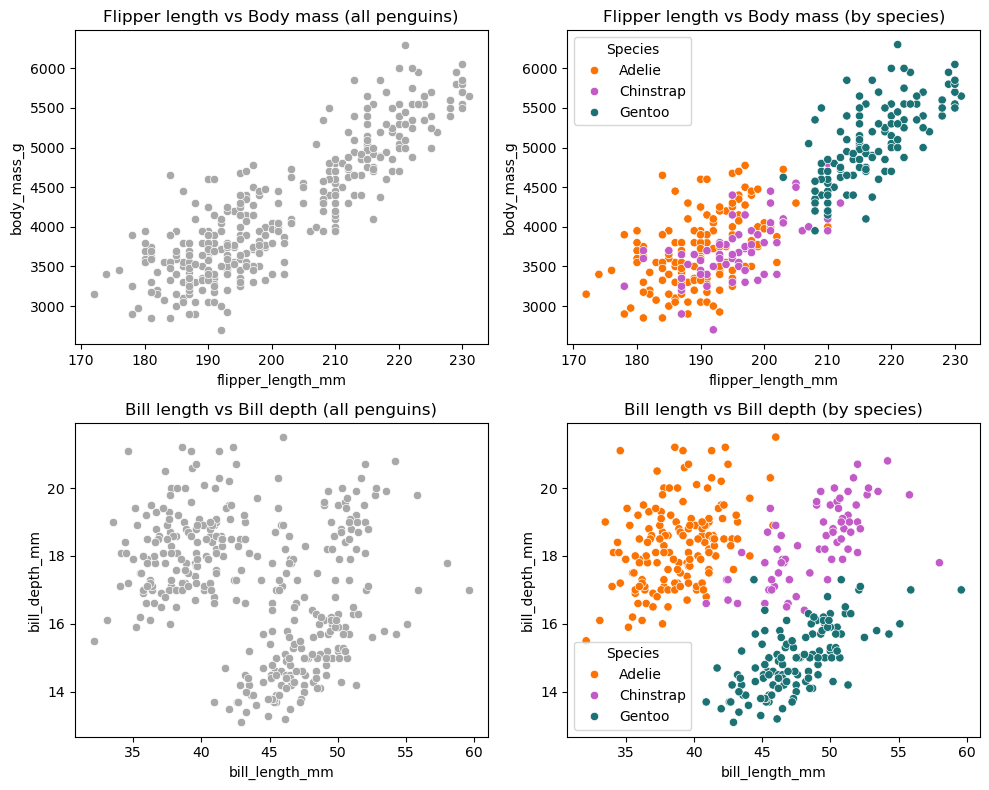

In [60]:
custom_palette = {
    'Gentoo': '#1b7173',
    'Adelie': '#fb7302',
    'Chinstrap': '#c25bc7'
}

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Flipper length vs body mass
sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g', color='darkgray', ax=axes[0, 0])
axes[0, 0].set_title('Flipper length vs Body mass (all penguins)')

sns.scatterplot(data=penguins, x='flipper_length_mm', y='body_mass_g',
                hue='species', palette=custom_palette, ax=axes[0, 1])
axes[0, 1].set_title('Flipper length vs Body mass (by species)')
axes[0, 1].legend(title='Species')

# Bill length vs bill depth
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', color='darkgray', ax=axes[1, 0])
axes[1, 0].set_title('Bill length vs Bill depth (all penguins)')

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm',
                hue='species', palette=custom_palette, ax=axes[1, 1])
axes[1, 1].set_title('Bill length vs Bill depth (by species)')
axes[1, 1].legend(title='Species')

plt.tight_layout()
plt.show()

> The scatterplots above give a first visual impression of how closely two numeric variables are related.
>
> In the top row, we see the relationship between *flipper length* and *body mass*.
> - When looking at all penguins together (left plot), there is a clear upward trend: penguins with longer flippers tend to be heavier.
> - When we color the points by species (right plot), this positive pattern becomes even clearer within each group. Gentoo penguins are generally both larger and heavier, while Adelie and Chinstrap penguins cluster at smaller body sizes.
>
> In the bottom row, the plots show *bill length* versus *bill depth*.
> - Across all penguins (left plot), the points form a scattered, somewhat downward pattern.
> - When colored by species (right plot), distinct clusters appear. Gentoo penguins have longer but shallower bills, Chinstraps tend to have long and relatively deep bills, while Adelies have shorter and deeper bills. When combined, these species differences create an overall negative relationship between bill length and bill depth.
>
> <img src='https://lauranavarroviz.wordpress.com/wp-content/uploads/2020/08/penguinsbill_plot_final.png?w=2034' alt='palmer_penguins' width='500'/>
>
> These examples highlight two key aspects of relationships between variables:
> - Strength - how closely the data points follow a consistent pattern or trend
> - Direction - the orientation of the trend, indicating whether it is positive (upward) or negative (downward)
> Scatterplots provide an intuitive first look at these relationships. In the next step, we will learn how to describe them numerically using covariance and correlation.
>
> But before we do that, it is worth checking out what the `pairplot()` function from `seaborn` can do

> *Note:* `pairplot()` is a convenient way to display all pairwise relationships between numeric variables in one figure.\
> It automatically creates a grid of scatterplots for each variable pair and shows the distribution of each variable along the diagonal.

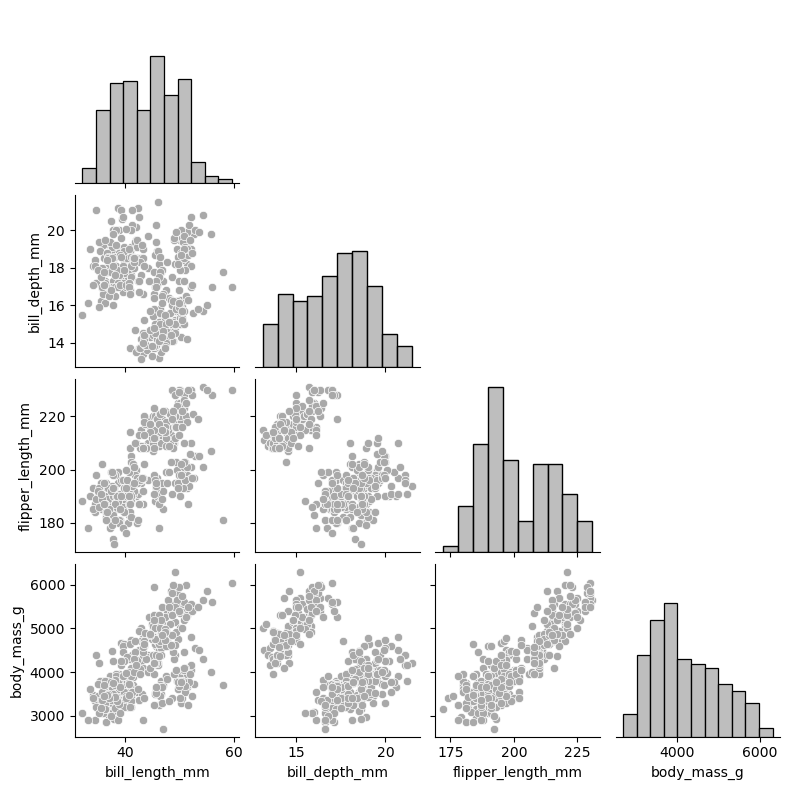

In [68]:
sns.pairplot(penguins, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], corner=True, height=2, aspect=1, plot_kws={'color': 'darkgray'}, diag_kws={'color': 'darkgray'} )
plt.show()

> By default, `pairplot()` creates a full matrix of plots - meaning it repeats the same scatterplots above and below the diagonal.\
> Setting `corner=True` tells seaborn to show only the lower triangle of this grid, removing duplicate plots and making the figure cleaner and easier to read.
>
> We can also color the points by species to reveal how group differences shape these relationships:

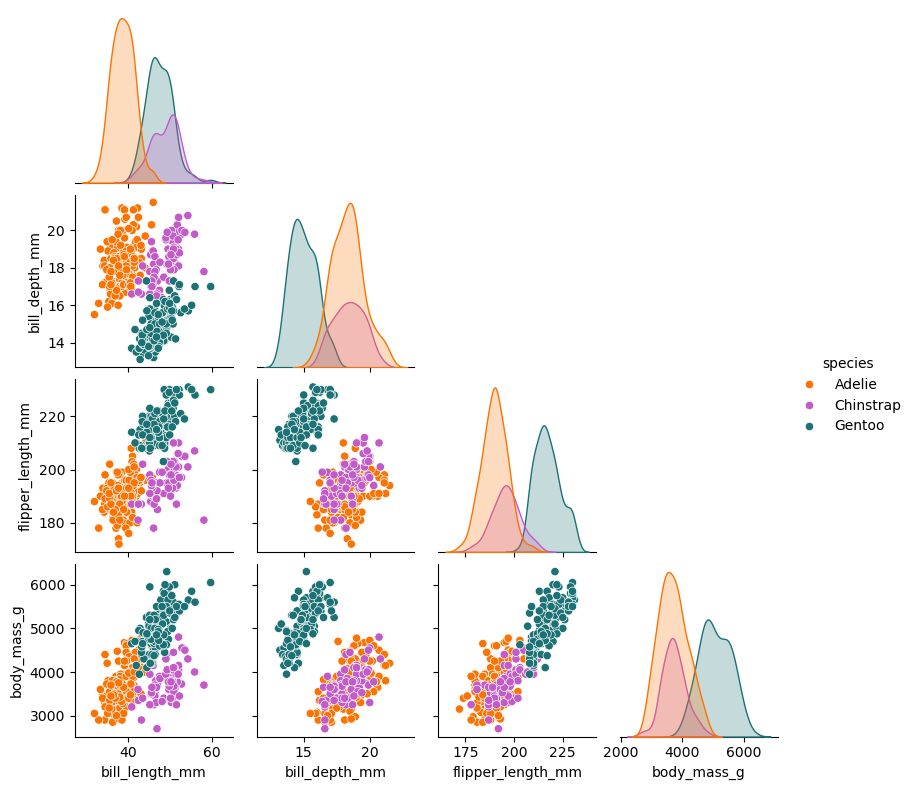

In [71]:
sns.pairplot(penguins, vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], hue='species',
             palette={'Gentoo': '#1b7173', 'Adelie': '#fb7302', 'Chinstrap': '#c25bc7'}, corner=True, height=2, aspect=1)
plt.show()

> This gives an excellent overview of the dataset:
> - The diagonal shows the distribution of each numeric variable.
> - The lower triangle displays pairwise scatterplots, highlighting the direction and strength of associations.
> - Coloring by species makes it clear how inter-species differences contribute to the overall relationships.
>
> In short, `pairplot()` is a powerful first step for visual data exploration, allowing us to observe relationships across all variables before quantifying them with covariance or correlation.

#### Correlation Coefficient  

So far, our scatterplots have shown visually whether two variables *move together* and in what direction.\
To make this idea more precise, we can describe the **strength** and **direction** of a relationship with a single number: the **correlation coefficient**.  

The most common version is **Pearson’s correlation coefficient** (Pearson product moment correlation coefficient), usually denoted as *r*.  
It measures the **linear association** between two continuous variables and always takes a value between −1 and +1:  

- *r = +1* → perfect positive linear relationship  
- *r = 0* → no linear relationship  
- *r = −1* → perfect negative linear relationship  

Values close to +1 or −1 indicate strong associations, while values near 0 indicate weak or no linear relationship.  


**Covariance - the idea behind correlation** 

To understand correlation, it helps to first look at **covariance**.  
Covariance is a generalization of variance that measures how two variables vary together:  

$$\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})$$


If both variables tend to move in the same direction (both increase or both decrease together), the covariance is **positive**.  
If one tends to increase when the other decreases, it is **negative**.  
If they are completely unrelated, the covariance is approximately **zero**.  

However, covariance is expressed in the **combined units** of both variables (for example, millimeters × grams), which makes it difficult to interpret.  


**Standardizing the covariance**  

Pearson’s correlation fixes this by **standardizing** the covariance, dividing it by the standard deviations of both variables:  
$$r = \frac{\text{Cov}(X, Y)}{s_X \, s_Y}$$ $$\boxed{r = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}}}$$

This removes the units and constrains the result to the range from −1 to +1.  
The resulting *r* keeps the same sign as the covariance (positive or negative) but now has a **meaningful scale** that can be compared across variable pairs.  


In the *Palmer Penguins* dataset, for example:  
- *Flipper length* and *body mass* are expected to have a **strong positive correlation**, since heavier penguins tend to have longer flippers.  
- *Bill length* and *bill depth* show a **negative correlation**, as species with longer bills generally have shallower ones.  

In the next section, we will calculate these correlations in Python and examine what the resulting numbers tell us.


#### <font color="#fc7202">Task 2:</font>  
Compute and interpret **Pearson’s correlation coefficients** for selected pairs of variables in the *Palmer Penguins* dataset.  

1. Use the `.corr()` method in pandas to calculate the correlation between:  
   - **Flipper length** (`flipper_length_mm`) and **body mass** (`body_mass_g`)  
   - **Bill length** (`bill_length_mm`) and **bill depth** (`bill_depth_mm`)  

2. Interpret the sign and magnitude of each correlation coefficient:  
   - Is the relationship positive or negative?  
   - Does it appear weak, moderate, or strong?  
   - Do the numerical results match what you observed in the scatterplots? 

3. Compute a full correlation matrix for all numeric variables to see how all pairs of measurements relate to one another.
    - Which variable pair shows the strongest linear relationship?
    - Does the correlation confirm what you saw in the scatterplots?
    - Why is it useful that the correlation coefficient is unitless?

In [72]:
# Calculating Pearson correlation coefficients
r_flipper_mass = penguins['flipper_length_mm'].corr(penguins['body_mass_g'])
r_bill = penguins['bill_length_mm'].corr(penguins['bill_depth_mm'])

print('Correlation (flipper length vs body mass):', round(r_flipper_mass, 3))
print('Correlation (bill length vs bill depth):', round(r_bill, 3))

Correlation (flipper length vs body mass): 0.871
Correlation (bill length vs bill depth): -0.235


In [13]:
# Full correlation matrix
penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


**Visualizing correlation patterns**  

Besides scatterplots, **heatmaps** are also often used to visualize correlations between variables.
They provide a compact overview of how all numeric variables relate to each other.
As we can see below, we can directly plot the Pearson correlation coefficients for all variable pairs in the dataset, where the color indicates both the direction (positive or negative) and the strength of the relationship.

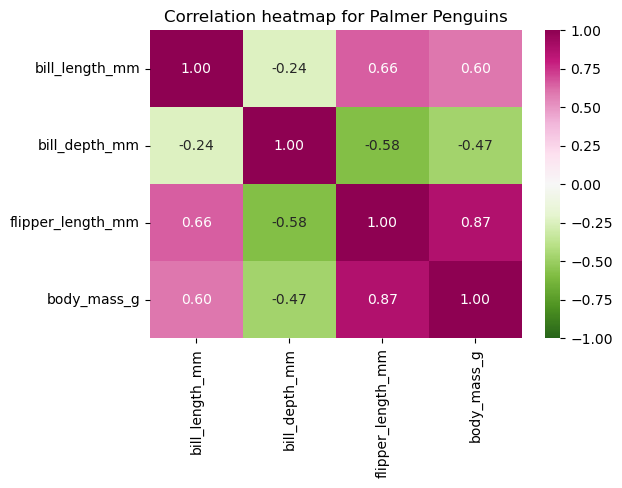

In [39]:
corr = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='PiYG_r', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation heatmap for Palmer Penguins')
plt.show()


**Interpreting correlation values**\
Naturally, in real data you rarely see correlations of exactly +1 or −1. So how should we interpret a correlation of, say, 0.4 or 0.7?
The answer depends on both the context and the discipline.

For example:
- In engineering, correlations below 0.9 might be considered weak
- In psychology or environmental sciences, correlations around 0.5 are already considered meaningful.
- In many biological or social datasets, even smaller correlations can be important if they are consistent and statistically significant.

In short, interpretation depends on what the data represent and how strong relationships typically are in that field.
Still, a rough descriptive guide like the one below is widely used:
| Correlation  | Strength    | Direction |
| ------------ | ----------- | --------- |
| −1.0 to −0.9 | Very strong | Negative  |
| −0.9 to −0.7 | Strong      | Negative  |
| −0.7 to −0.4 | Moderate    | Negative  |
| −0.4 to −0.2 | Weak        | Negative  |
| −0.2 to 0.0  | Negligible  | Negative  |
| 0.0 to 0.2   | Negligible  | Positive  |
| 0.2 to 0.4   | Weak        | Positive  |
| 0.4 to 0.7   | Moderate    | Positive  |
| 0.7 to 0.9   | Strong      | Positive  |
| 0.9 to 1.0   | Very strong | Positive  |

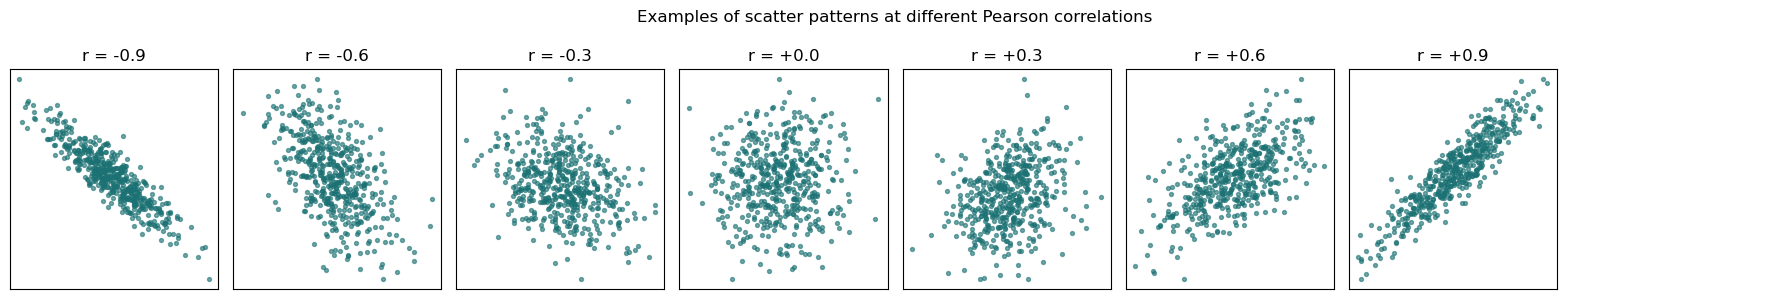

In [57]:
# Visualizing the correlations: -0.9, -0.6, -0.3, 0.0, 0.3, 0.6, 0.9
np.random.seed(42)
rs = [-0.9, -0.6, -0.3, 0.0, 0.3, 0.6, 0.9]
fig, axes = plt.subplots(1, 8, figsize=(18, 3))
axes = axes.ravel()
for i, r in enumerate(rs):
    cov = np.array([[1, r],[r, 1]])
    xy = np.random.multivariate_normal(mean=[0,0], cov=cov, size=500)
    ax = axes[i]
    ax.scatter(xy[:,0], xy[:,1], s=8, alpha=0.6, color='#1b7173')
    ax.set_title(f'r = {r:+.1f}')
    ax.set_xticks([]); ax.set_yticks([])
axes[-1].axis('off')
fig.suptitle('Examples of scatter patterns at different Pearson correlations', y=0.98)
plt.tight_layout()
plt.show()

However, one thing cannot be emphasized enough: a single correlation value can be misleading if you do not look at the data.

Two datasets can have exactly the same correlation, yet show completely different patterns when visualized.
This is why visualization is such an essential part of data analysis.

To demonstrate this, let’s return to a dataset we first encountered in the very first practice session - the Anscombe dataset.
It was originally created by Francis Anscombe (1973) precisely to illustrate this point.

> *Recall:* Each of the four datasets in Anscombe’s Quartet has two variables (*x* and *y*).
> All four share almost identical summary statistics - but they look completely different when plotted.

#### <font color="#fc7202">Task 3:</font>  
Visualize **all four** datasets from **Anscombe’s Quartet**, then compute the **Pearson correlation coefficient** for each and compare the results.

Reflect on what this result means:
- If all four datasets have the same correlation coefficient, does that mean they look the same?
- What does this tell you about the limitations of using a single correlation coefficient value to describe a relationship?

> *Hint:* To load the data, use `sns.load_dataset('anscombe')`.


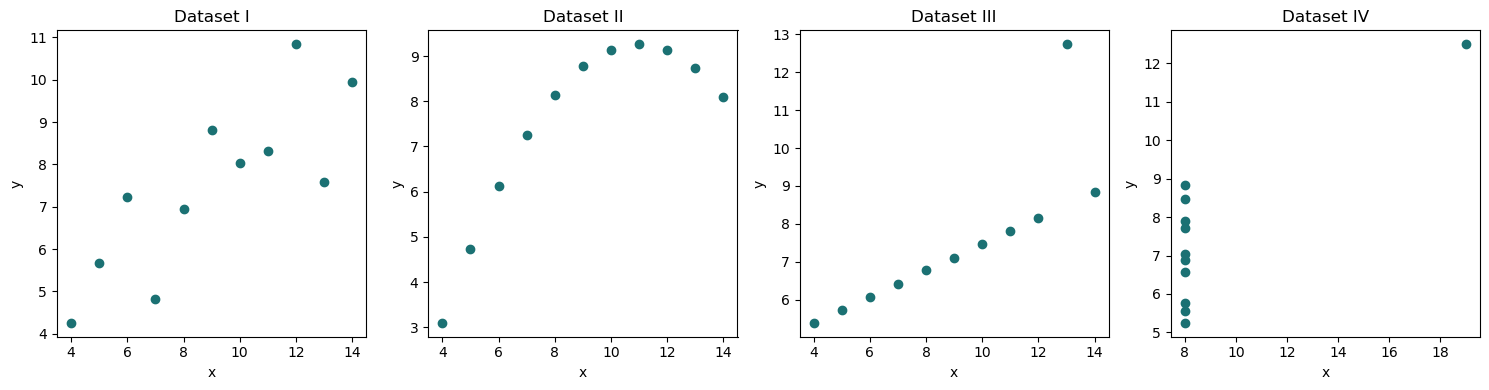

In [ ]:
# Loading Anscombe’s Quartet
anscombe = sns.load_dataset('anscombe')

# Visualizing the datasets
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
axes = axes.ravel()
titles = ['I', 'II', 'III', 'IV']

for ax, label in zip(axes, titles):
    df = anscombe[anscombe['dataset'] == label]
    ax.scatter(df['x'], df['y'], color='#1b7173')
    ax.set_title(f'Dataset {label}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

In [ ]:
# Calculating the correlation between x (independent variable) and y (dependent variable) within each dataset
correlations = anscombe.groupby('dataset')[['x', 'y']].corr().iloc[0::2, -1]
print(correlations)

dataset   
I        x    0.816421
II       x    0.816237
III      x    0.816287
IV       x    0.816521
Name: y, dtype: float64


This example highlights one of the main limitations of the Pearson correlation coefficient.\
Although it is extremely useful, it only measures the strength of a **linear** relationship between two variables.\
In other words, it captures how well the data points align along a straight line.

In many cases this is perfectly fine - many of the relationships we study are roughly linear, and Pearson’s *r* gives a good summary.\
However, sometimes two variables can be strongly related in a nonlinear way, and Pearson’s correlation will fail to capture that.

For example, the relationship between two variables can be monotonic but nonlinear - that is, as one variable increases, the other also increases, but not at a constant rate.
In such cases, Pearson’s *r* may underestimate how strongly the variables are related.

To handle this, we can use Spearman’s rank correlation, often denoted as *ρ*.
It measures how well the relationship between two variables can be described by a monotonic function rather than a straight line.
In other words, it assesses whether the order (rank) of the values in one variable corresponds to the order in the other.

**Spearman’s rank correlation formulas**

If there are **no tied ranks**, Spearman’s *ρ* can be computed directly from the rank differences:
$$\rho = 1 - \frac{6\sum d_i^2}{n(n^2 - 1)}$$
where:  
- $n$ = number of observations  
- $d_i = R(x_i) - R(y_i)$ = difference between the ranks of $x_i$ and $y_i$

If there **are tied ranks**, we must first convert both variables to their **ranked values**, and then apply the Pearson correlation formula to these ranks:
$$\rho = \frac{\text{cov}(R_X, R_Y)}{s_{R_X}\, s_{R_Y}}$$
where:  
- $R_X, R_Y$ are the rank-transformed variables  
- $s_{R_X}, s_{R_Y}$ are the standard deviations of the ranks  

Both formulas produce the same result when no ties are present.

**Let’s look at a simple example.**\
Suppose you want to find out whether there is any relationship between students’ performance in two subjects - Physics and Mathematics.

You have the exam scores for nine students:
- **Physics:** 35, 23, 47, 17, 10, 43, 9, 6, 28  
- **Mathematics:** 45, 18, 100, 12, 8, 70, 6, 5, 28 

To answer this question, you can calculate the Spearman rank correlation coefficient, which measures how well the rankings of students in one subject correspond to their rankings in the other.

1. **Rank each variable (ascending; smallest = 1)**

Physics values in ascending order: 6, 9, 10, 17, 23, 28, 35, 43, 47\
Ranks $R_P$: 6→1, 9→2, 10→3, 17→4, 23→5, 28→6, 35→7, 43→8, 47→9  

Mathematics values in ascending order: 5, 6, 8, 12, 18, 28, 45, 70, 100   
Ranks $R_M$: 5→1, 6→2, 8→3, 12→4, 18→5, 28→6, 45→7, 70→8, 100→9

2. **Create the rank table and compute $d_i$ and $d_i^2$**

| Student | Physics | Mathematics | $R_P$ | $R_M$ | $d_i = R_P - R_M$ | $d_i^2$ |
|:------:|--------:|------------:|--------:|--------:|---------------------:|----------:|
| 1 | 35 | 45  | 7 | 7 | 0 | 0 |
| 2 | 23 | 18  | 5 | 5 | 0 | 0 |
| 3 | 47 | 100 | 9 | 9 | 0 | 0 |
| 4 | 17 | 12  | 4 | 4 | 0 | 0 |
| 5 | 10 | 8   | 3 | 3 | 0 | 0 |
| 6 | 43 | 70  | 8 | 8 | 0 | 0 |
| 7 | 9  | 6   | 2 | 2 | 0 | 0 |
| 8 | 6  | 5   | 1 | 1 | 0 | 0 |
| 9 | 28 | 28  | 6 | 6 | 0 | 0 |

$\sum d_i^2 = 0$

3. **Apply the formula**
Since there are **no rank differences**, we can calculate:
$\rho = 1 - \frac{6 \cdot 0}{9(9^2 - 1)} = 1 - 0 = 1.0$

The Spearman rank correlation is **ρ = 1.0**, indicating a **perfect positive monotonic relationship**.  


#### <font color="#fc7202">Task 4:</font>  
Explore the relationship between students’ scores in **Physics** and **Mathematics** using both **Spearman’s** and **Pearson’s** correlation coefficients.

**Data**
- Physics: 35, 23, 47, 17, 10, 43, 9, 6, 28  
- Mathematics: 45, 18, 100, 12, 8, 70, 6, 5, 28  

1. Visualize the data\
    Create a scatterplot to inspect whether the relationship looks linear or nonlinear.
2. Compute Spearman’s correlation
3. Compute Pearson’s correlation
4. Interpret and compare

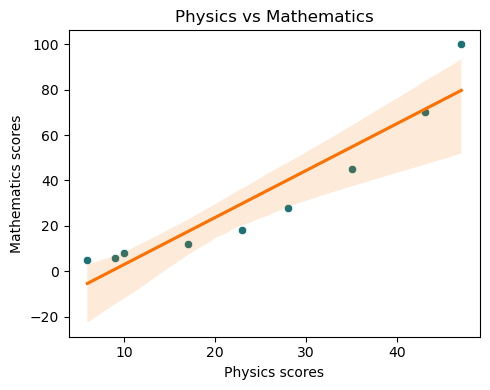

Spearman ρ: 1.0
Pearson r: 0.942


In [ ]:
physics = pd.Series([35, 23, 47, 17, 10, 43, 9, 6, 28])
maths   = pd.Series([45, 18, 100, 12, 8, 70, 6, 5, 28])

# Visualizing the data
plt.figure(figsize=(5,4))
sns.scatterplot(x=physics, y=maths, color='#1b7173')
sns.regplot(x=physics, y=maths, scatter=False, color='#fc7202')
plt.xlabel('Physics scores')
plt.ylabel('Mathematics scores')
plt.title('Physics vs Mathematics')
plt.tight_layout()
plt.show()

r_spearman = physics.corr(maths, method='spearman')
print('Spearman ρ:', round(r_spearman, 3))

r_pearson = physics.corr(maths, method='pearson')
print('Pearson r:', round(r_pearson, 3))

> Pearson’s $r = 0.942$ indicates a very strong linear relationship between the two variables: as one increases, the other tends to increase in a nearly straight-line fashion.\
> Spearman’s $ρ = 1.0$ indicates a perfect monotonic relationship: the ranks of the two variables increase together without any reversals.\
> Therefore, we can conclude that both correlation coefficients reveal a strong positive association.\
> The fact that $ρ = 1.0$ but $r = 0.942$ suggests that the relationship is perfectly monotonic but not perfectly linear (the data follow a smooth increasing trend, with slight curvature or nonlinearity).

#### <font color="#fc7202">Task 5:</font>  
Prior to the start of the final games of the **FIBA Basketball World Cup 2023**, students at Stockholm University predicted the final ranking of the last eight teams. The file `FIBA2023.tsv` contains the **actual finishing order** and each **student’s predicted order**.

- Compute the **Spearman rank correlation** between each student’s ranking and the actual finishing order.  
- Determine for which student(s) the correlation is **not significantly different from zero** at the 95% confidence level.


In [77]:
fiba2023 = pd.read_csv('FIBA2023.tsv', sep='\t')
fiba2023.head()

,Team,Rank,Student1,Student2,Student3
0,Slovenia,7,4,7,6
1,Italy,8,6,8,8
2,Germany,1,1,1,2
3,Serbia,2,3,4,7
4,Canada,3,2,2,3


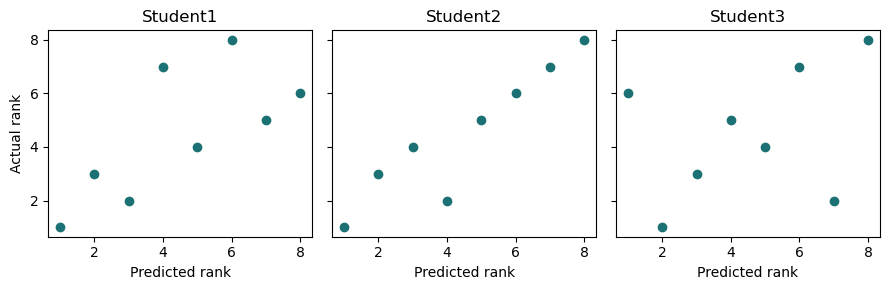

In [81]:
# Visualizing the data
actual_col = 'Rank'
student_cols = ['Student1', 'Student2', 'Student3']

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
for ax, col in zip(axes, student_cols):
    ax.scatter(fiba2023[col], fiba2023[actual_col], color='#1b7173')
    ax.set_title(col)
    ax.set_xlabel('Predicted rank')
axes[0].set_ylabel('Actual rank')
plt.tight_layout()
plt.show()

In [84]:
# Calculating Spearman's rho and p-value between each student's scores and the actual ranks
rows = []
for col in student_cols:
    rho, p = spearmanr(fiba2023[col], fiba2023[actual_col])
    rows.append({'student': col, 'spearman_rho': rho, 'p_value': p})

# Creating a summary DataFrame and sorting students by correlation strength (highest rho first)
result = pd.DataFrame(rows).sort_values('spearman_rho', ascending=False).reset_index(drop=True)

# Marking statistically significant correlations at the 95% confidence level (alpha = 0.05)
alpha = 0.05
result['significant_0.05'] = result['p_value'] <= alpha
result

,student,spearman_rho,p_value,significant_0.05
0,Student2,0.928571,0.000863,True
1,Student1,0.714286,0.046528,True
2,Student3,0.357143,0.385121,False


> At the 95% confidence level, only Student 3 shows a correlation that is *not significantly* different from zero.\
> Although Student 3 has a positive Spearman’s $ρ = 0.36$, the corresponding $p\text{-value} = 0.385 > 0.05$ indicates that this correlation could have arisen by chance.\
> Therefore, we fail to reject the null hypothesis of no association between Student 3’s rankings and the actual ranks.\
> In contrast, both Student 1 ($ρ = 0.71$, $p = 0.0465$) and Student 2 ($ρ = 0.93$, $p = 0.0009$) have statistically significant positive correlations.
> 

#### <font color="#fc7202">Task 6:</font>

Use the `animals.tsv` dataset to study the association between **body mass** and **brain weight**.

The dataset contains brain weight and body mass for 28 species: 24 mammals plus humans and three dinosaurs (Brachiosaurus, Dipliodocus, Triceratops). The brain-body mass ratio is sometimes used as a rough proxy for encephalization. For this exercise we ignore phylogenetic nonindependence.


1. Visualize the relationship between brain and body weight
    - Create a scatterplot of brain vs body.
    - Highlight humans and dinosaurs in the plot using different colors.

2. Explore distributions
    - Create histograms of body and brain weights.
    - Observe if the distributions are strongly skewed.

3. Test normality
    - Perform a Shapiro–Wilk test for both body and brain
    - Compare *p*-values to the 0.05 significance level

4. Calculate correlation coefficients
    - Compute the Pearson correlation between body and brain weight.
    - Compute the Spearman rank correlation between body and brain weight.
    - Report both the correlation coefficients and their *p*-values.

5. Recalculate correlations excluding the dinosaurs to see how much they influence the relationship.

In [97]:
animals = pd.read_csv('Animals.tsv', sep='\t')
animals.head()

,Animal,body,brain
0,Mountain beaver,1.35,8.1
1,Cow,465.00,423.0
2,Grey wolf,36.33,119.5
3,Goat,27.66,115.0
4,Guinea pig,1.04,5.5


In [104]:
# Creating a new column 'classification' by assigning each animal to a category: replacing specific names with 'Dinosaur' or 'Human', and labeling all others as 'Mammal'
animals['classification'] = (animals['Animal'].replace({'Brachiosaurus': 'Dinosaur', 'Dipliodocus': 'Dinosaur', 'Triceratops': 'Dinosaur', 'Human': 'Human'}).apply(lambda x: x if x in ['Human', 'Dinosaur'] else 'Mammal'))

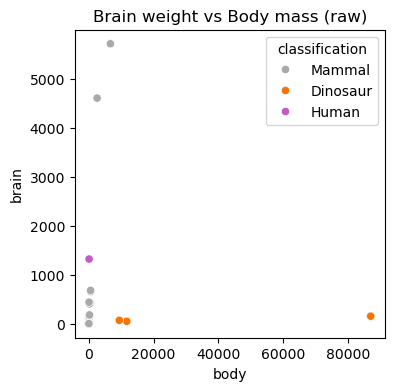

In [107]:
# Plotting brain weight vs body mass
plt.figure(figsize=(4, 4))
sns.scatterplot(data=animals, x='body', y='brain', hue='classification', palette=['darkgray', '#fc7202', '#c25bc7'])
plt.title('Brain weight vs Body mass (raw)')
plt.show()

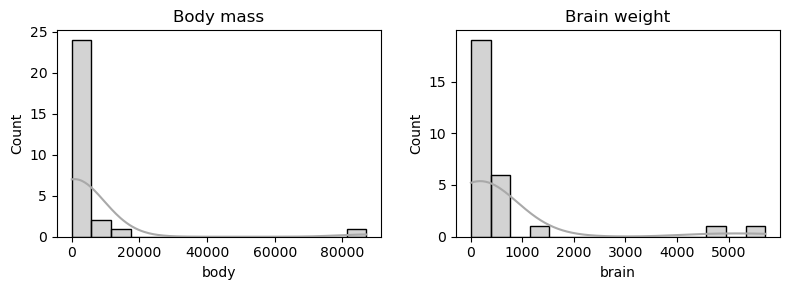

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
sns.histplot(animals['body'], ax=axes[0], bins=15, color='darkgray', kde=True)
axes[0].set_title('Body mass')
sns.histplot(animals['brain'], ax=axes[1], bins=15, color='darkgray', kde=True)
axes[1].set_title('Brain weight')
plt.tight_layout()
plt.show()

> Based on the histograms, we can clearly see that both body mass and brain weight are highly skewed, with most values concentrated at the lower end and a few extremely large observations stretching the distribution to the right.

In [111]:
# Testing for normality
for col in ['body', 'brain']:
    stat, p = shapiro(animals[col])
    print(f'{col} (raw): W={stat:.3f}, p={p:.4f}')

body (raw): W=0.278, p=0.0000
brain (raw): W=0.452, p=0.0000


> The Shapiro–Wilk test results show very small *p*-values (both < 0.001) for body mass (W = 0.278) and brain weight (W = 0.452).\
> Since these *p*-values are far below the 0.05 significance level, we reject the null hypothesis of normality for both variables.\
> This means that neither body mass nor brain weight follows a normal distribution, which is consistent with the strong right-skewness observed in their histograms.

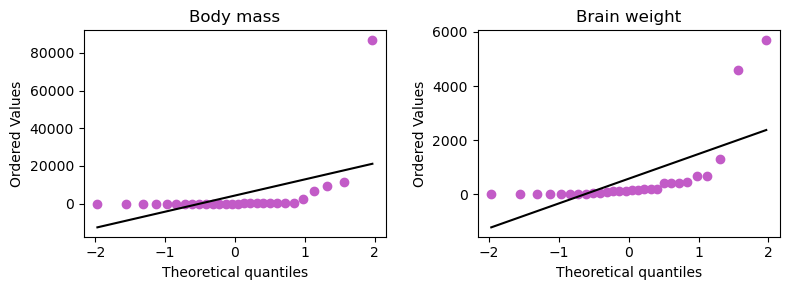

In [ ]:
# Q-Q plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

stats.probplot(animals.body, dist="norm", plot=ax1)
ax1.get_lines()[0].set_markerfacecolor('#c25bc7')   
ax1.get_lines()[0].set_markeredgecolor('#c25bc7')
ax1.get_lines()[1].set_color('black')          
ax1.set_title("Body mass")

stats.probplot(animals.brain, dist="norm", plot=ax2)
ax2.get_lines()[0].set_markerfacecolor('#c25bc7')   
ax2.get_lines()[0].set_markeredgecolor('#c25bc7')
ax2.get_lines()[1].set_color('black')          
ax2.set_title("Brain weight")

plt.tight_layout()

> Pearson’s correlation assumes (approximately) normal data and a linear relationship.\
> The histograms and Q-Q plots above show strong right-skew, consistent with a log-normal pattern.\
> Therefore, we’ll log-transform both variables, re-check normality, and then compute Pearson’s $r$ on the transformed scale.\
> We’ll also report Spearman’s $ρ$ on the raw data as an assumption-free robustness check.

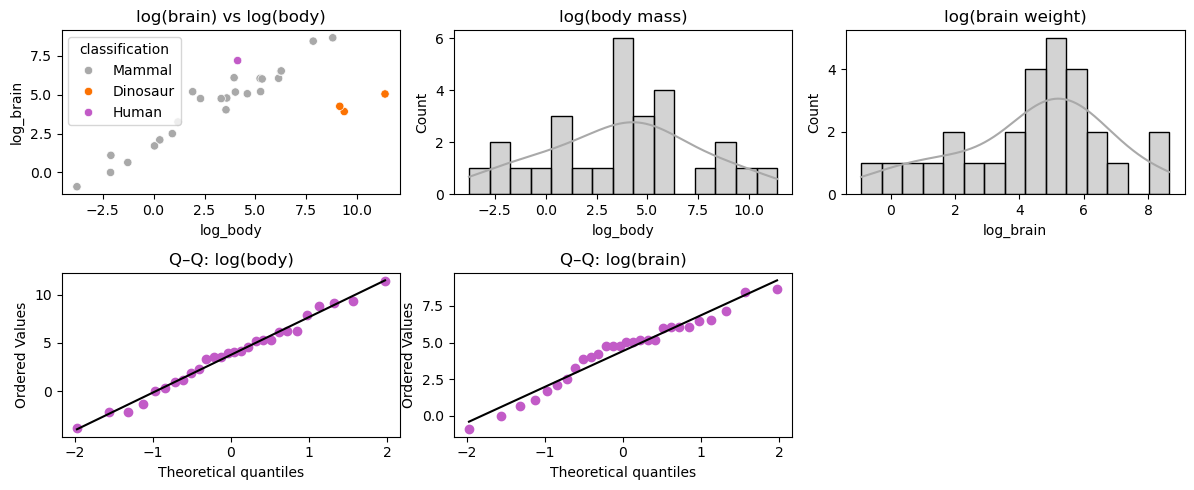

In [ ]:
# Creating log-transformed variables
animals['log_body'] = np.log(animals['body'])
animals['log_brain'] = np.log(animals['brain'])

# Visualizing distributions after transformation
fig, axes = plt.subplots(2, 3, figsize=(12, 5))
axes = np.ravel(axes)

# 1) Scatter: log(body) vs log(brain)
sns.scatterplot(
    data=animals, x='log_body', y='log_brain',
    hue='classification', palette=['darkgray', '#fc7202', '#c25bc7'],
    ax=axes[0]
)
axes[0].set_title('log(brain) vs log(body)')

# 2) Histogram: log(body)
sns.histplot(animals['log_body'].dropna(), bins=15, color='darkgray', kde=True, ax=axes[1])
axes[1].set_title('log(body mass)')

# 3) Histogram: log(brain)
sns.histplot(animals['log_brain'].dropna(), bins=15, color='darkgray', kde=True, ax=axes[2])
axes[2].set_title('log(brain weight)')

# 4) Q–Q: log(body)
stats.probplot(animals['log_body'].dropna(), dist='norm', plot=axes[3])
axes[3].get_lines()[0].set_markerfacecolor('#c25bc7')
axes[3].get_lines()[0].set_markeredgecolor('#c25bc7')
axes[3].get_lines()[1].set_color('black')
axes[3].set_title('Q–Q: log(body)')

# 5) Q–Q: log(brain)  <-- the key fix is plot=axes[4], not ax2
stats.probplot(animals['log_brain'].dropna(), dist='norm', plot=axes[4])
axes[4].get_lines()[0].set_markerfacecolor('#c25bc7')
axes[4].get_lines()[0].set_markeredgecolor('#c25bc7')
axes[4].get_lines()[1].set_color('black')
axes[4].set_title('Q–Q: log(brain)')

# Hide the unused 6th subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()


In [120]:
# Re-testing normality (Shapiro–Wilk) on log scale
for col in ['log_body', 'log_brain']:
    W, p = shapiro(animals[col].dropna())
    print(f'{col}: W={W:.3f}, p={p:.4f}')


log_body: W=0.985, p=0.9433
log_brain: W=0.958, p=0.3100


In [121]:
# Computing Pearson correlation on log-transformed variables
r, p = pearsonr(animals['log_body'], animals['log_brain'])
print(f"Pearson r (log scale): r={r:.3f}, p={p:.4f}")

# Reporting Spearman on raw data as a robustness check
rho, p_s = spearmanr(animals['body'], animals['brain'])
print(f"Spearman rho (raw): rho={rho:.3f}, p={p_s:.4f}")

Pearson r (log scale): r=0.779, p=0.0000
Spearman rho (raw): rho=0.716, p=0.0000


> After log-transforming the variables, the distributions are approximately normal.\
> The Shapiro–Wilk tests support this: log_body (W = 0.985, **p* = 0.9433) and log_brain (W = 0.958, *p* = 0.3100) both yield *p* > 0.05, so we fail to reject null hypotheses.\
> Given these diagnostics—together with the improved histograms and Q-Q plots - it is appropriate to use a parametric Pearson correlation on the log scale.\
> On that scale, Pearson’s *r* = 0.779 (*p* < 0.001) indicates a strong positive linear association between `log(body mass)` and `log(brain weight)`.\
> For comparison, Spearman’s *ρ* on the raw data is 0.716 (*p* < 0.001), showing a similarly strong monotonic relationship, albeit slightly attenuated by skew and nonlinearity.
>
> However, the plots also reveal that dinosaur observations deviate markedly from the rest. Because dinosaurs constitute a biologically distinct group, we next remove them and re-estimate both coefficients on the remaining data.

In [122]:
# Filtering out dinosaurs and re-computing correlations
non_dino = animals[animals['classification'] != 'Dinosaur'].copy()

# Pearson on log–log data
r, p_r = pearsonr(non_dino['log_body'], non_dino['log_brain'])
print(f"Pearson r (log scale, no dinos): r={r:.3f}, p={p_r:.4f}")

# Spearman on raw data
rho, p_rho = spearmanr(non_dino['body'], non_dino['brain'])
print(f"Spearman rho (raw, no dinos): rho={rho:.3f}, p={p_rho:.4f}")


Pearson r (log scale, no dinos): r=0.960, p=0.0000
Spearman rho (raw, no dinos): rho=0.933, p=0.0000


> After removing the dinosaur observations, the relationship between body mass and brain weight becomes even stronger and more consistent.\
> Pearson’s *r* on the log-transformed data increases to 0.960 (*p* < 0.001), indicating an exceptionally strong positive linear association between `log(body mass)` and `log(brain weight)`.\
> Similarly, Spearman’s *ρ* on the raw data rises to 0.933 (*p* < 0.001), confirming a nearly perfect monotonic trend.

#### <font color="#fc7202">Let’s play: Guess the correlation!</font>

- **Game 1:** Guess The Correlation → <https://www.guessthecorrelation.com/>
- **Game 2:** GeoGebra “Guess r” → <https://www.geogebra.org/m/KE6JfuF9>